In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') # Скрываетм предупреждения LightGBM

In [34]:
df = pd.read_csv('Housing.csv')

In [35]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [37]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


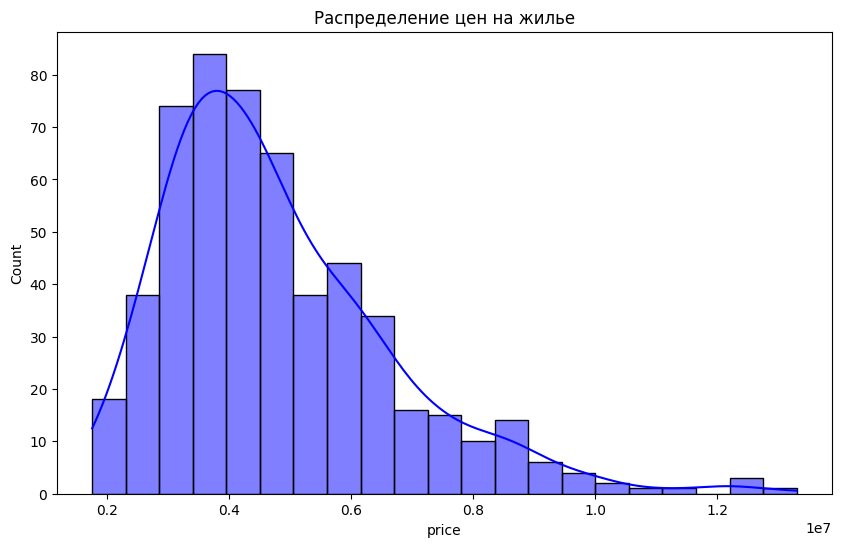

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Распределение цен на жилье')
plt.show()

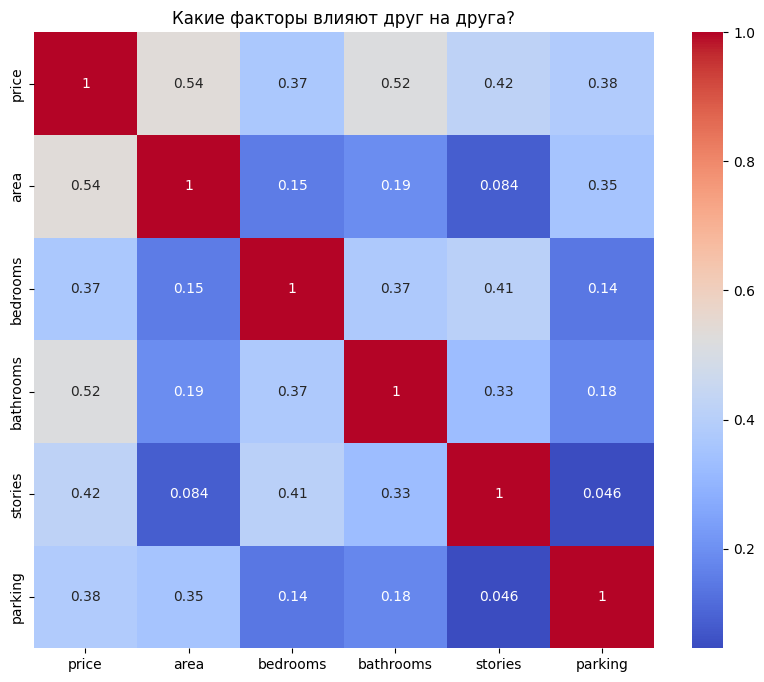

In [39]:
corr_matrix = df.select_dtypes(include=[np.number]).corr() 
plt.figure(figsize=(10, 8))               
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Какие факторы влияют друг на друга?') 
plt.show()          

In [40]:
le = LabelEncoder()
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in columns:
    df[col] = le.fit_transform(df[col])

In [41]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


In [43]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [44]:
!pip install xgboost

In [45]:
from xgboost import XGBRegressor 
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [46]:
r2_rf = r2_score(y_test, rf_model.predict(X_test))
r2_xgb = r2_score(y_test, xgb_model.predict(X_test))
print(f"Точность RF {r2_rf:.4f}")
print(f"Точность XGBoost:{r2_xgb:.4f}")

Точность RF 0.6115
Точность XGBoost:0.6498


In [47]:
!pip install catboost

In [48]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(n_estimators=100, learning_rate=0.1, verbose=False, random_state=42)
cb.fit(X_train, y_train)
r2_cb = r2_score(y_test, cb.predict(X_test))
print(f"Точность cb {r2_cb:.4f}")

Точность cb 0.6371


In [49]:
!pip install lightgbm

In [50]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(
    n_estimators=100, 
    learning_rate=0.05, 
    min_child_samples=5,  
    num_leaves=15,        
    verbose=-1            
)
lgbm.fit(X_train, y_train)
r2_lgbm = r2_score(y_test, lgbm.predict(X_test))
print(f"Точность lgbm {r2_lgbm:.4f}")

Точность lgbm 0.6302


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
r2_lr = r2_score(y_test, lr.predict(X_test))
print(f"Точность lr {r2_lr:.4f}")

Точность lr 0.6495


In [52]:
class MyDeepDecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.feature_idx = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def fit(self, X, y, depth=0):
        X_arr, y_arr = np.array(X), np.array(y)
        if depth >= self.max_depth or len(y_arr) <= 5 or np.var(y_arr) == 0:
            self.value = np.mean(y_arr)
            return
        best_mse = np.inf
        for f_idx in range(X_arr.shape[1]):
            thresholds = np.unique(X_arr[:, f_idx])
            if len(thresholds) > 10:
                thresholds = np.percentile(thresholds, [20, 40, 60, 80])

            for t in thresholds:
                mask = X_arr[:, f_idx] <= t
                if not np.any(mask) or not np.any(~mask): continue
                
                mse = np.var(y_arr[mask]) * sum(mask) + np.var(y_arr[~mask]) * sum(~mask)
                if mse < best_mse:
                    best_mse, self.feature_idx, self.threshold = mse, f_idx, t

        if self.feature_idx is None:
            self.value = np.mean(y_arr)
            return

        self.left = MyDeepDecisionTree(max_depth=self.max_depth)
        self.left.fit(X_arr[X_arr[:, self.feature_idx] <= self.threshold], y_arr[X_arr[:, self.feature_idx] <= self.threshold], depth + 1)
        
        self.right = MyDeepDecisionTree(max_depth=self.max_depth)
        self.right.fit(X_arr[X_arr[:, self.feature_idx] > self.threshold], y_arr[X_arr[:, self.feature_idx] > self.threshold], depth + 1)

    def predict_one(self, x):
        if self.value is not None: return self.value
        if x[self.feature_idx] <= self.threshold:
            return self.left.predict_one(x)
        return self.right.predict_one(x)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in np.array(X)])

In [53]:
class MyRandomForest:
    def __init__(self, n_estimators=10, max_depth=10):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            tree = MyDeepDecisionTree(max_depth=self.max_depth)
            tree.fit(X.iloc[indices], y.iloc[indices])
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0)

In [54]:
my_rf = MyRandomForest(n_estimators=50)
my_rf.fit(X_train, y_train)
r2_my_rf = r2_score(y_test, my_rf.predict(X_test))
print(f"My RF: {r2_my_rf:.4f}")

My RF: 0.6143


In [70]:
class MyGradientBoosting:
    def __init__(self, n_estimators=10, lr=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.lr = lr
        self.max_depth = max_depth
        self.trees = []
        self.init_pred = None

    def fit(self, X, y):
        self.init_pred = np.mean(y)
        curr_pred = np.full(len(y), self.init_pred) 
        for _ in range(self.n_estimators):
            residual = y - curr_pred
            tree = MyDeepDecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.trees.append(tree)
            curr_pred += self.lr * tree.predict(X)

    def predict(self, X):
        y_pred = np.full(len(X), self.init_pred)
        for tree in self.trees:
            y_pred += self.lr * tree.predict(X)
        return y_pred



In [71]:
my_gb = MyGradientBoosting(n_estimators=50, lr=0.1)
my_gb.fit(X_train, y_train)
r2_my_gb = r2_score(y_test, my_gb.predict(X_test))
print(f"Точность My GB : {r2_my_gb:.4f}")

Точность My GB : 0.6451


In [73]:
print("Сравнение R2 (2026)")
print(f"Точность My RF {r2_my_rf:.4f}")
print(f"Точность My GB {r2_my_gb:.4f}")
print(f"Точность RF {r2_rf:.4f}")
print(f"Точность XGBoost:{r2_xgb:.4f}")
print(f"Точность cb {r2_cb:.4f}")
print(f"Точность lgbm {r2_lgbm:.4f}")
print(f"Точность lr {r2_lr:.4f}")

Сравнение R2 (2026)
Точность My RF 0.6143
Точность My GB 0.6451
Точность RF 0.6115
Точность XGBoost:0.6498
Точность cb 0.6371
Точность lgbm 0.6302
Точность lr 0.6495
